<a href="https://colab.research.google.com/github/Prerna-Karle/Advance-Quantum-Computation/blob/main/P01_Bernstein%E2%80%93Vazirani_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.3 MB/s eta 0:00:00


In [2]:
!pip install qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.0 MB/s eta 0:00:00


#Step 1: Import Required Libraries

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Step 2: Define the Hidden Binary String

In [4]:
# Hidden binary string (secret)
secret_string = "1011"
n = len(secret_string)

#Step 3: Create the Quantum Circuit

In [5]:
qc = QuantumCircuit(n + 1, n)

#Step 4: Initialize the Auxiliary Qubit

In [6]:
qc.x(n)        # Set auxiliary qubit to |1>
qc.h(n)        # Apply Hadamard gate

#Step 5: Apply Hadamard Gates to Input Qubits

In [7]:
for i in range(n):
    qc.h(i)

#Step 6: Build the Oracle

In [8]:
for i, bit in enumerate(secret_string):
    if bit == "1":
        qc.cx(i, n)

#Step 7: Apply Hadamard Gates Again

In [9]:
for i in range(n):
    qc.h(i)

#Step 8: Measure the Input Qubits

In [10]:
for i in range(n):
    qc.measure(i, i)

#Step 9: Draw the Circuit

In [11]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9b9389ed5abfbc4c4f2faab6af1fa5fa268be14f985e71a95f6e6d9a95ac63d8
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


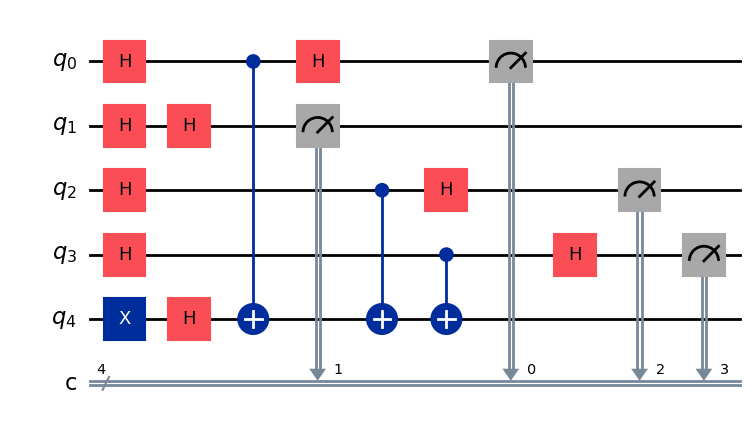

In [12]:
qc.draw("mpl")

#Step 10: Run the Simulation

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("Measurement Result:", counts)

Measurement Result: {'1101': 1024}


#Step 11: Display the Output

Measurement Results: {'1101': 1024}


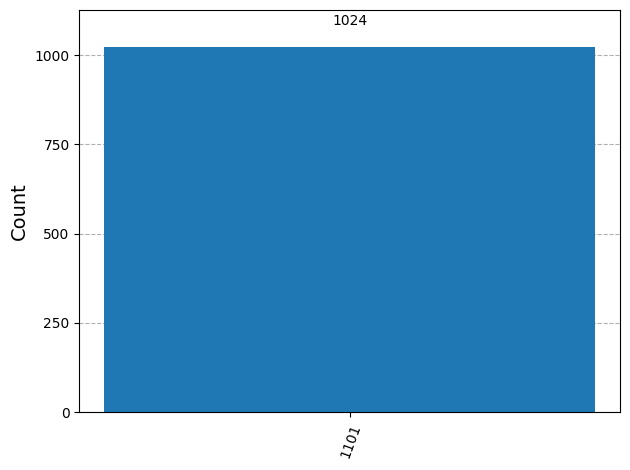

In [14]:
print("Measurement Results:", counts)
plot_histogram(counts)